# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [6]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [7]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [9]:
# Contagem de saudáveis e doentes por sexo
bivariada = df.groupby('sex')['flag_doente'].agg(
    saudaveis=lambda x: (x == 0).sum(),
    doentes=lambda x: (x == 1).sum()
).reset_index()

# Total de indivíduos por sexo
bivariada['total'] = bivariada['saudaveis'] + bivariada['doentes']

# Quantidade média de doentes
bivariada['media_doentes'] = bivariada['doentes'] / bivariada['total']

# Cálculo dos Odds
bivariada['odds'] = bivariada['doentes'] / bivariada['saudaveis']

# Odds ratio usando o total como referência
odds_total = df['flag_doente'].mean() / (1 - df['flag_doente'].mean())
bivariada['odds_ratio'] = bivariada['odds'] / odds_total

# Logito (Log dos Odds)
bivariada['logito'] = np.log(bivariada['odds'])

# Weight of Evidence (Log do Odds Ratio)
bivariada['woe'] = np.log(bivariada['odds_ratio'])

# Exibir o resultado
print(bivariada)

   sex  saudaveis  doentes  total  media_doentes      odds  odds_ratio  \
0  0.0         72       25     97       0.257732  0.347222    0.409672   
1  1.0         92      114    206       0.553398  1.239130    1.461996   

    logito       woe  
0 -1.05779 -0.892398  
1  0.21441  0.379802  


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [17]:
# Categorizar a variável 'age' em 5 grupos
bins = [29, 39, 49, 59, 69, 79]
labels = ['29-39', '40-49', '50-59', '60-69', '70-79']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Agrupar os dados por grupos de idade e flag_doente
bivariada_age = df.groupby('age_group')['flag_doente'].value_counts().unstack(fill_value=0)

# Renomeando as colunas para facilitar a leitura
bivariada_age.columns = ['Saudáveis', 'Doentes']

# Calculando totais
bivariada_age['Total'] = bivariada_age['Saudáveis'] + bivariada_age['Doentes']

# Calculando a quantidade média de doentes
bivariada_age['Média Doentes'] = bivariada_age['Doentes'] / bivariada_age['Total']

# Calculando Odds e Odds Ratio
bivariada_age['Odds'] = bivariada_age['Doentes'] / bivariada_age['Saudáveis']
bivariada_age['Odds Ratio'] = bivariada_age['Odds'] / (bivariada_age['Doentes'].sum() / bivariada_age['Saudáveis'].sum())

# Calculando Logito e WOE
bivariada_age['Logito'] = np.log(bivariada_age['Odds'])
bivariada_age['WOE'] = np.log(bivariada_age['Odds Ratio'])

# Calculando a média da variável 'age' para cada grupo
bivariada_age['Média Idade'] = df.groupby('age_group')['age'].mean()

# Exibindo o resultado
print(bivariada_age)

           Saudáveis  Doentes  Total  Média Doentes      Odds  Odds Ratio  \
age_group                                                                   
29-39              8        3     11       0.272727  0.375000    0.442446   
40-49             50       21     71       0.295775  0.420000    0.495540   
50-59             63       53    116       0.456897  0.841270    0.992577   
60-69             35       57     92       0.619565  1.628571    1.921480   
70-79              8        5     13       0.384615  0.625000    0.737410   

             Logito       WOE  Média Idade  
age_group                                   
29-39     -0.980829 -0.815437    35.181818  
40-49     -0.867501 -0.702108    43.704225  
50-59     -0.172843 -0.007450    54.293103  
60-69      0.487703  0.653096    62.826087  
70-79     -0.470004 -0.304611    71.307692  


C:\Users\Joel\AppData\Local\Temp\ipykernel_20752\2095113709.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bivariada_age = df.groupby('age_group')['flag_doente'].value_counts().unstack(fill_value=0)
C:\Users\Joel\AppData\Local\Temp\ipykernel_20752\2095113709.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bivariada_age['Média Idade'] = df.groupby('age_group')['age'].mean()


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

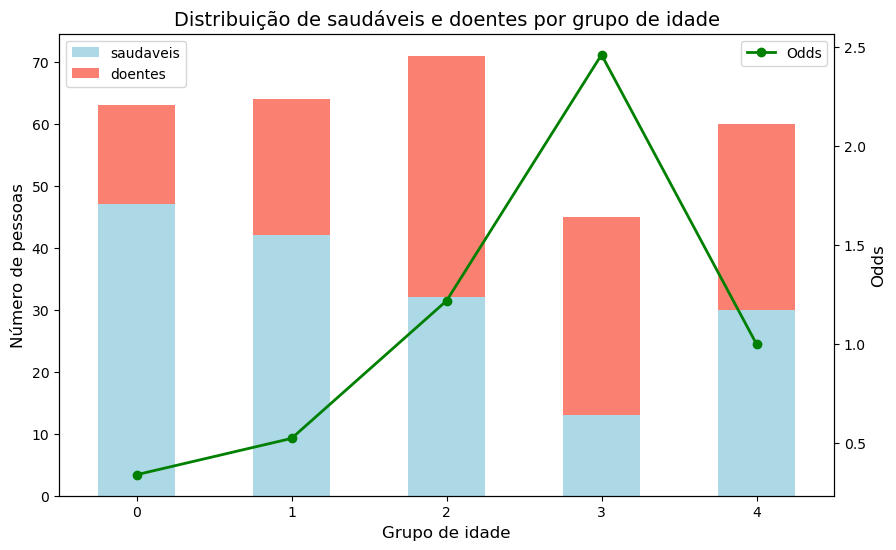

In [22]:
# Plotando a bivariada usando um gráfico de barras empilhadas e uma linha para os Odds
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de barras empilhadas para saudáveis e doentes
bivariada_age.set_index('age_group')[['saudaveis', 'doentes']].plot(kind='bar', stacked=True, ax=ax1, color=['lightblue', 'salmon'])

# Personalizar o eixo y
ax1.set_ylabel('Número de pessoas', fontsize=12)
ax1.set_xlabel('Grupo de idade', fontsize=12)
ax1.set_title('Distribuição de saudáveis e doentes por grupo de idade', fontsize=14)
ax1.tick_params(axis='x', rotation=0)

# Adicionar um segundo eixo para os Odds
ax2 = ax1.twinx()
ax2.plot(bivariada_age['odds'], color='green', marker='o', linewidth=2, label='Odds')

# Personalizar o eixo secundário
ax2.set_ylabel('Odds', fontsize=12)
ax2.grid(False)

# Exibir a legenda para ambos os eixos
ax1.legend(loc='upper left', fontsize=10)
ax2.legend(loc='upper right', fontsize=10)

plt.show()